### Importing libraries and uploading data

##### In order to start, I am importing the necessary libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Next, I am creating the variable "df" by importing the dataset; I am allowing for a possible mistake in the file path (which I did actually make, on my first attempt!), and asking the notebook to alert me if that's the case. Upon using the head() function, leaving the brackets blank to display the default first 5 lines, I can see that there are 24 columns, and what the field names are.

In [8]:
try:
    df = pd.read_csv(r"C:\Users\allie\Desktop\DA Course\Python projects\Final Projects\Global_Superstore.csv")
except FileNotFoundError:
    print("Error: The file 'Global_Superstore.csv' was not found. Please check the file path.")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


### Data Exploration

##### Here I am using commands to understand the size and structure of the dataframe. I can see there are 1000 records; I can also see that the date fields' data type will need to be changed, together with the postcode, which is currently a float. The majority of postcodes are also missing; looking at the 5 records above, this may be because they are international orders.

In [9]:
df.shape

(1000, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


### Data Cleaning

##### As previously noted, checking for null values (below) confirms that there are 806 missing entries in the Postal Code column.

In [12]:
df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

##### Below, I am converting the date fields to the proper datetime format, and the postcode field to string (object). I then replace the missing records, previously showing as "NaN", to something more meaningful ("Unknown").

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y', errors='coerce')

In [14]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [15]:
df['Postal Code'] = df['Postal Code'].replace('NaN', 'Unknown')

##### Finally, I check the info again, to confirm that the above changes have taken place. They have!

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          1000 non-null   int64         
 1   Order ID        1000 non-null   object        
 2   Order Date      1000 non-null   datetime64[ns]
 3   Ship Date       1000 non-null   datetime64[ns]
 4   Ship Mode       1000 non-null   object        
 5   Customer ID     1000 non-null   object        
 6   Customer Name   1000 non-null   object        
 7   Segment         1000 non-null   object        
 8   Postal Code     1000 non-null   object        
 9   City            1000 non-null   object        
 10  State           1000 non-null   object        
 11  Country         1000 non-null   object        
 12  Region          1000 non-null   object        
 13  Market          1000 non-null   object        
 14  Product ID      1000 non-null   object        
 15  Categ

### Basic Analysis

##### The next step is aggregating sales and profit. I rounded up the profit to two decimals, as it initially resulted in a very long float.

In [17]:
print(f"Total Sales:", df['Sales'].sum())

Total Sales: 1710971.47


In [18]:
print(f"Total Profit:", round(df['Profit'].sum(), 2))

Total Profit: 288920.44


##### Now I want to find the top-selling products: I grouped product IDs and names by total sales of each product, and sorted the resulting series in descending order. I can see that the top 5 products are the Motorola, Apple, Cisco, Nokia and Samsung smart phones. If I wanted to pick a different number of top products to see, I would probably convert the series into a dataframe, which would give me more scope for analysis.

In [19]:
product_sales = df.groupby(['Product ID', 'Product Name'])['Sales'].sum()
print(product_sales.sort_values(ascending=False))

Product ID   Product Name                                                              
TEC-PH-5268  Motorola Smart Phone, Full Size                                               48542.52
TEC-PH-3148  Apple Smart Phone, Full Size                                                  42303.44
TEC-PH-3806  Cisco Smart Phone, Full Size                                                  41325.20
TEC-PH-5355  Nokia Smart Phone, Full Size                                                  27661.97
TEC-PH-5839  Samsung Smart Phone, Cordless                                                 25438.59
                                                                                             ...   
OFF-AR-5301  Newell 323                                                                        3.36
OFF-BI-2911  Acco Hanging Data Binders                                                         3.05
OFF-AR-5458  OIC #2 Pencils, Medium Soft                                                       3.01
OFF-AP-4739 

##### I then perform a similar process to group and sort sales by region. I can see that Western Europe is at the top, followed by Oceania and Southern, Eastern, Southeastern Asia. Western Asia ranks much lower; it would be interesting to determine whether it is a naturally smaller market or if there is potential to adopt measures to increase sales here. At the bottom is Canada, together with all US regions and Western Africa. Other parts of Africa rank marginally better, but it does appear that sales could be improved in North America and the African continent.

In [20]:
sales_by_region = df.groupby('Region')['Sales'].sum()
print(sales_by_region.sort_values(ascending=False))

Region
Western Europe       259576.28
Oceania              220809.08
Southern Asia        205466.26
Eastern Asia         193590.60
Southeastern Asia    147337.60
Central America      140966.21
Northern Europe      103888.63
Southern Europe       94441.11
South America         64550.54
Eastern Europe        45662.19
Central Africa        33810.48
Western Asia          33308.21
Caribbean             30746.74
North Africa          26266.44
Southern Africa       22262.28
Eastern Africa        17387.94
Central US            17187.94
Western US            16729.95
Western Africa        15478.79
Eastern US            12256.44
Southern US            8360.75
Canada                  887.01
Name: Sales, dtype: float64


##### As the above series has raised questions as to what could be improved, I wanted to see how sales relate to profits. To do so, I added the Profit column next to the Sales one, and then calculated the profit margin (multiplying it by 100, so as to obtain the percentage). I then rounded it to 2 decimal places, for better readability. It appears that the top selling regions are not the ones that return the best profits! In fact, the best profit margins are to be found between the middle and the bottom of the Sales ranking: Central US (33.02%), Central Africa (28.6%) and North Africa (28.24%). In a real-life scenario, the company might want to determine what produces the significant disparity in profit margin between the Central US and other US regions; also, they might want to explore ways to increase profit margins in Southeastern Asia (7.17%) and Western Africa (8.26%).

In [21]:
regional_summary = df.groupby('Region')[['Sales', 'Profit']].sum()

regional_summary = regional_summary.sort_values(by='Sales', ascending=False)

regional_summary['Profit Margin'] = (regional_summary['Profit'] / regional_summary['Sales']) * 100

regional_summary['Profit Margin'] = regional_summary['Profit Margin'].round(2)

print(regional_summary)

                       Sales    Profit  Profit Margin
Region                                               
Western Europe     259576.28  32783.40          12.63
Oceania            220809.08  33777.56          15.30
Southern Asia      205466.26  37536.60          18.27
Eastern Asia       193590.60  37911.16          19.58
Southeastern Asia  147337.60  10561.80           7.17
Central America    140966.21  21741.95          15.42
Northern Europe    103888.63  23552.73          22.67
Southern Europe     94441.11  20557.50          21.77
South America       64550.54   7723.58          11.97
Eastern Europe      45662.19  12228.45          26.78
Central Africa      33810.48   9668.22          28.60
Western Asia        33308.21   5262.35          15.80
Caribbean           30746.74   5463.82          17.77
North Africa        26266.44   7416.42          28.24
Southern Africa     22262.28   4876.32          21.90
Eastern Africa      17387.94   4302.72          24.75
Central US          17187.94

### Visualisations

##### Before producing the bar chart, I create a dataframe that contains the data I will need: the categories, and total sales for each. I arranged it in descending order for clarity.

In [23]:
category_sales = df.groupby('Category')['Sales'].sum()

category_sales_df = category_sales.reset_index(name='Total Sales')

category_sales_df = category_sales_df.sort_values(by='Total Sales', ascending=False)

print(category_sales_df)

          Category  Total Sales
2       Technology    756983.02
0        Furniture    601492.31
1  Office Supplies    352496.14


##### Now on to creating the bar chart. I added semi-transparent grid lines for better readability, and adjusted the layout so that no labels would be cut off. The chart clearly illustrates the three categories' contributions to our sales.

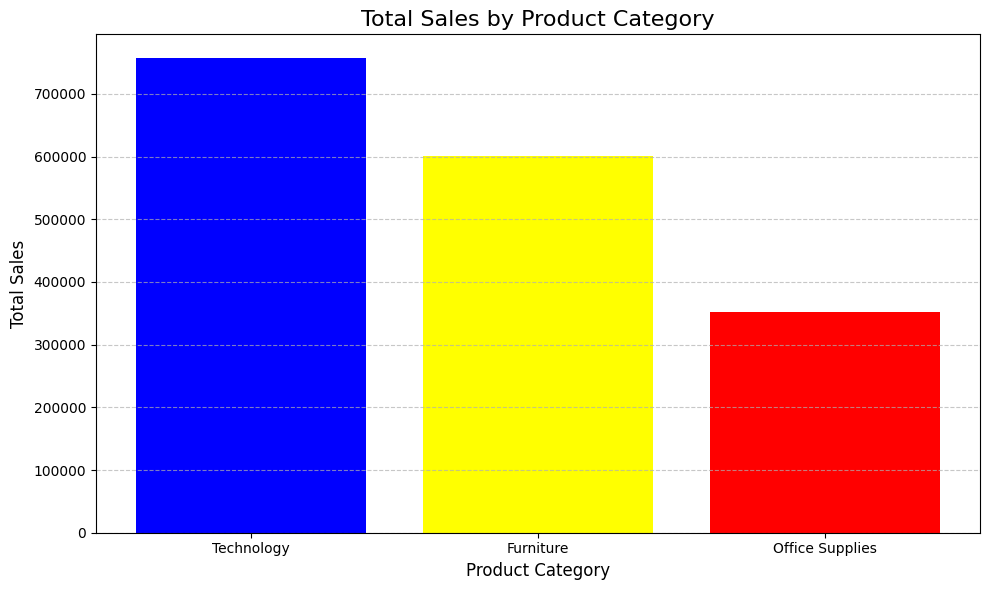

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=category_sales_df['Category'], height=category_sales_df['Total Sales'], color=['blue', 'yellow', 'red'])

ax.set_title('Total Sales by Product Category', fontsize=16)
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Total Sales', fontsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Before creating the line graph, I again isolate the data I need from the original dataframe. I set the order date as the index, so that I can use the resample function. Initially, I used 'M' to resample by month end, but an error message said it will be phased out and replaced by 'ME'.

In [29]:
df_time = df.set_index('Order Date')

monthly_sales = df_time['Sales'].resample('ME').sum()

print(monthly_sales.head())

Order Date
2012-01-31    11627.23
2012-02-29    20635.28
2012-03-31    13516.89
2012-04-30     7222.25
2012-05-31    21908.53
Freq: ME, Name: Sales, dtype: float64


##### Below I create the line graph, using the index and the values from the above series for the x and y axes. I inclined the labels on the x axis for readability. The graph shows an upward trend to our sales.

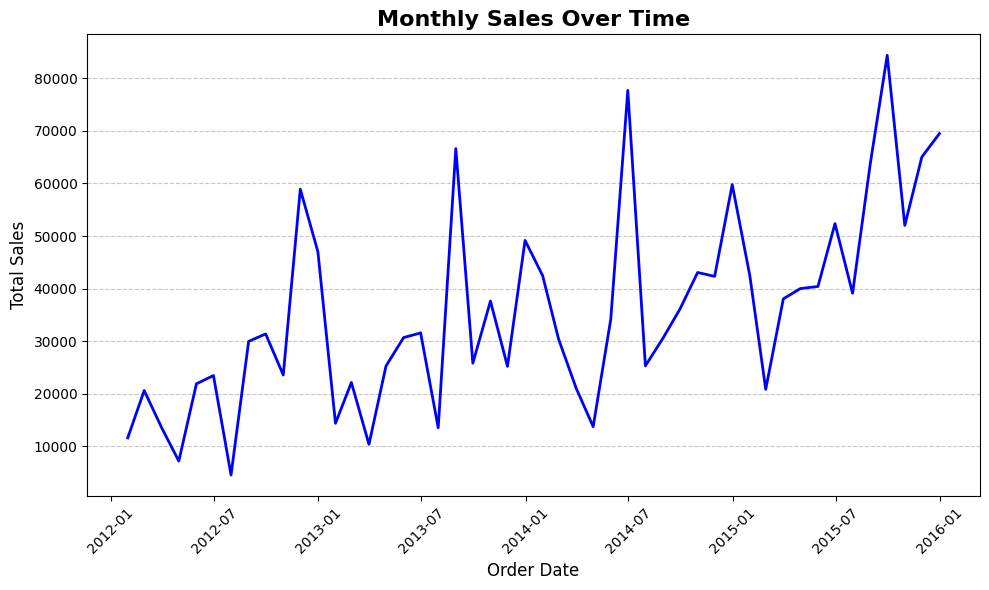

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(monthly_sales.index, monthly_sales.values, linestyle='-', color='blue', linewidth=2)

ax.set_title('Monthly Sales Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Order Date', fontsize=12)
ax.set_ylabel('Total Sales', fontsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### The next visualisation is a scatterplot. If I have produced this correctly, it would indicate that some transactions result in a loss, rather than a profit, as the dots are below the 0 line - these seem to be some of the transactions where the sales price is under £4000. A large number of transactions also just break even.

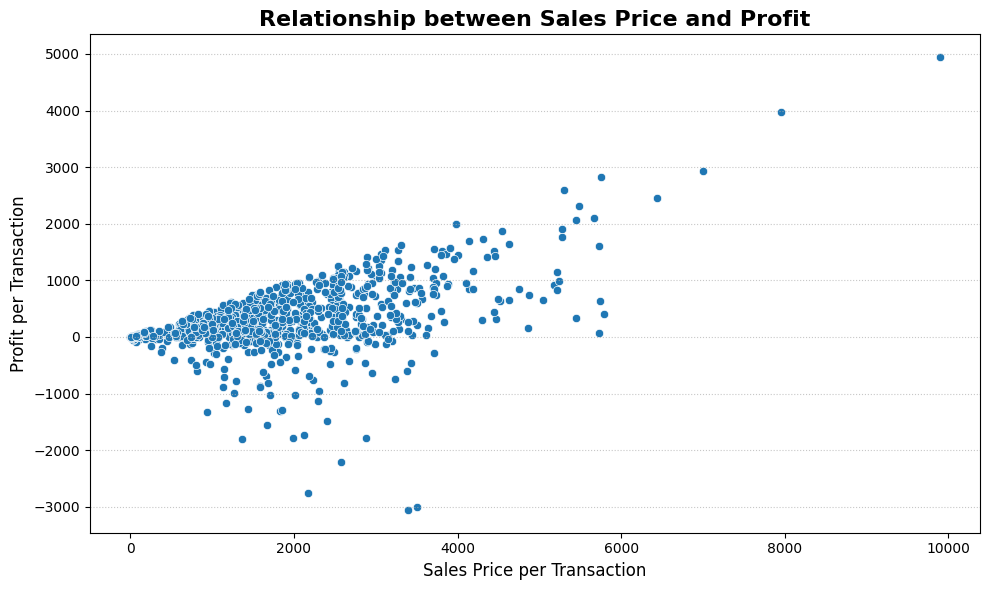

In [31]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Sales', y='Profit', data=df)

plt.title('Relationship between Sales Price and Profit', fontsize=16, fontweight='bold')
plt.xlabel('Sales Price per Transaction', fontsize=12)
plt.ylabel('Profit per Transaction', fontsize=12)

plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

##### Before producing the heat map, I create a pivot table where the rows represent the categories, the columns the regions, and the values are the sales; I calculate the total sales per region and sort the columns from highest to lowest. I then create the plot; after experimenting, I increased its height to make it clearer. While creating the map, I put the actual numbers inside the boxes, removed decimals for a cleaner look, and added thin white lines between the boxes. I also printed out the pivot table under the heat map, for reference.

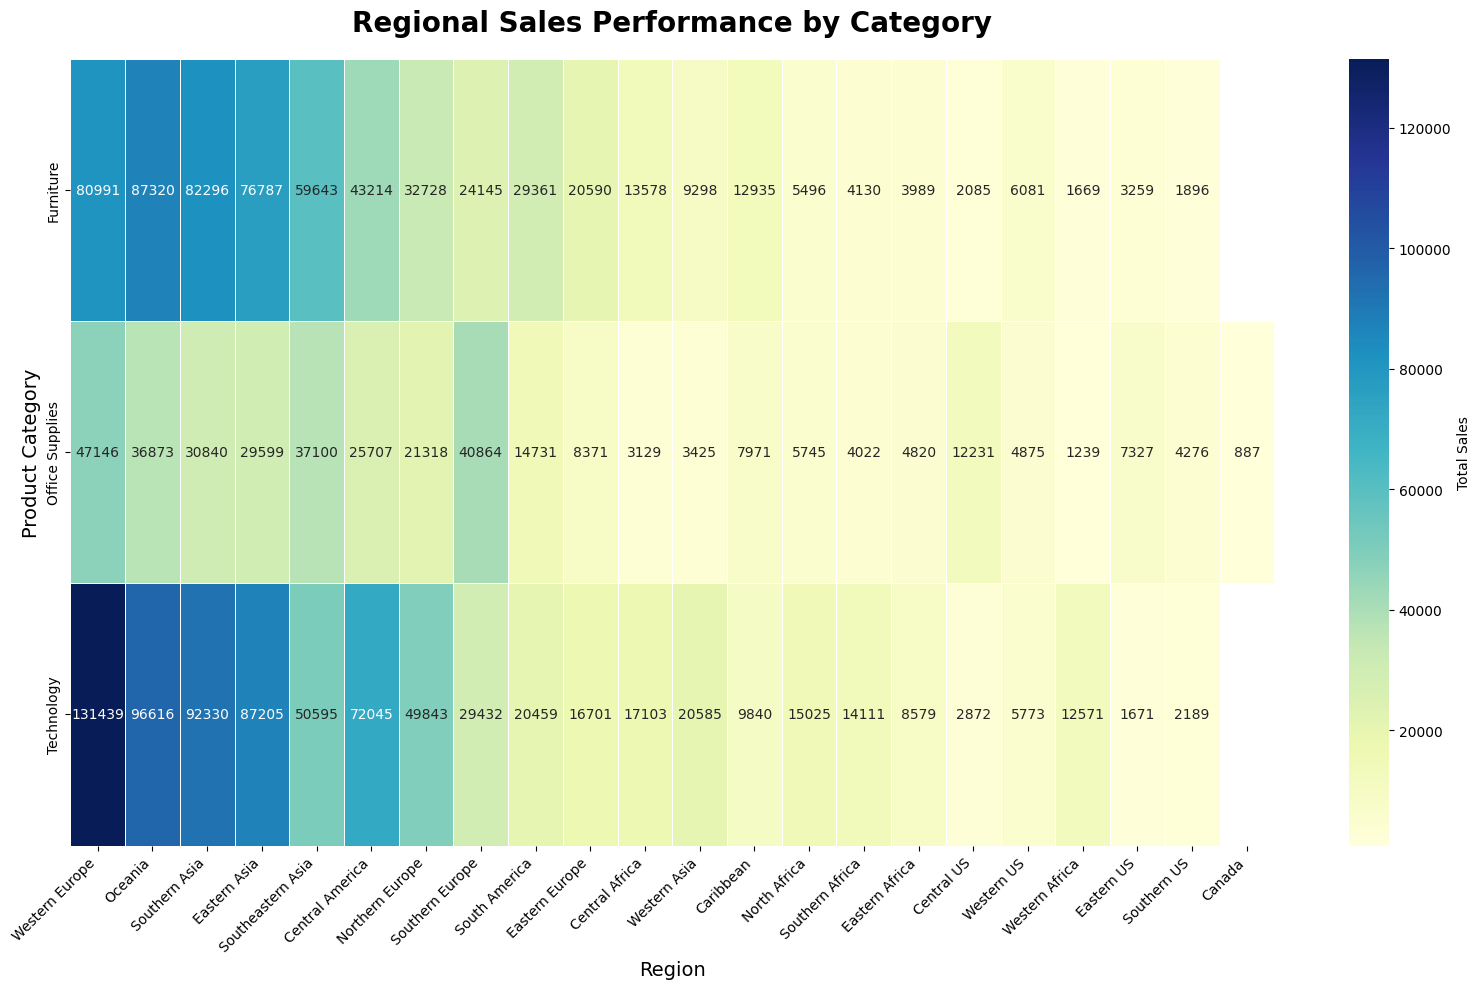


--- The Pivot Table Grid ---
Region           Western Europe   Oceania  Southern Asia  Eastern Asia  \
Category                                                                 
Furniture              80991.02  87320.35       82296.17      76786.81   
Office Supplies        47146.29  36872.86       30840.09      29599.25   
Technology            131438.97  96615.87       92330.00      87204.54   

Region           Southeastern Asia  Central America  Northern Europe  \
Category                                                               
Furniture                 59642.64         43213.84         32728.42   
Office Supplies           37099.69         25707.02         21317.61   
Technology                50595.27         72045.35         49842.60   

Region           Southern Europe  South America  Eastern Europe  ...  \
Category                                                         ...   
Furniture               24145.47       29360.74        20589.99  ...   
Office Supplies       

In [32]:
pivot_table = df.pivot_table(index='Category', columns='Region', values='Sales', aggfunc='sum')

region_order = pivot_table.sum().sort_values(ascending=False).index
pivot_table_sorted = pivot_table[region_order]

plt.figure(figsize=(16, 10)) 

sns.heatmap(pivot_table_sorted, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Total Sales'})

plt.title('Regional Sales Performance by Category', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n--- The Pivot Table Grid ---")
print(pivot_table_sorted)

### Key Insights

The analysis revealed an upward trajectory in global sales over the four-year period. However, significant seasonality is evident, with pronounced peaks between October and December.  

While the Western Europe and North America regions lead in total sales volume, they do not always lead in profits. The analysis of profit margins revealed that a number of high-volume regions are operating on thinner margins than some low-volume ones.  

The heatmap showed that Technology and Furniture are the primary drivers of high-value transactions. However, Office Supplies maintain a consistent volume across all global regions. Additionally, from the scatter plot it appeared that while Furniture generates high revenue, it is also associated with the highest frequency of loss-making transactions, potentially due to high delivery costs of bulky items, or heavy discounts.

### Brief Report

This report summarises the findings of data analysis conducted on the GlobalMart dataset between 2012 and 2015. The objective was to identify growth trends, evaluate regional performance, and assess the relationship between sales volume and profitability, in order to provide strategic recommendations for the future.

The line graph revealed a consistent upward trajectory in global sales over the four-year period. However, significant seasonality is evident, with pronounced peaks in the fourth quarter (October to December). This suggests that GlobalMart is heavily reliant on holiday-season demand, creating a high-pressure operational period at the end of each year.

While the Western Europe and North America regions lead in total sales volume, they do not always lead in profits. The analysis of profit margins revealed that several high-volume regions are actually operating on thin margins. Conversely, certain other markets contribute to lower total sales but significantly higher profit margins.

The heat map shows that Technology and Furniture are the primary drivers of high-value transactions. However, Office Supplies maintains a consistent volume across all global regions. Additionally, from the scatter plot it appeared that while Furniture generates high revenue, it is also associated with the highest frequency of loss-making transactions, potentially due to high delivery costs of bulky items, or heavy discounts.

A recommendation for GlobalMart could be to look into the operational costs of the highest-selling regions. If the profit margin is narrow despite the high sales, maybe they could investigate logistics expenses, or any other costs such as local promotional strategies that may be eroding the profits.

Furthermore, to mitigate the risks associated with the extreme seasonality, GlobalMart could introduce mid-year promotional campaigns, or even loyalty discounts in quarters 2 and 3. Reducing the "valley" between the "peaks" will also improve cash flow and warehouse efficiency.

Finally, given the significant number of negative-profit transactions, which look to be caused mainly by the Furniture category, GlobalMart might want to review delivery costs and/or discounts for bulky items. Also, shifting the focus toward Technology and Office Supplies in regions with high logistics costs could protect future profitability.